In [8]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

In [9]:
inputFilename = '../data/tissue_counts_male_female.txt'

fileID = open(inputFilename,'r')
header = True

tissueNames = []
maleUsable = []
femaleUsable = []
maleTotal = []
femaleTotal = []

for line in fileID:   
    if header == True:
        header = False
        continue
    fields = line.split('\t')
    tissueNames.append(fields[0])
    maleTotal.append(int(fields[2]))
    femaleTotal.append(int(fields[3]))
    """
    maleUsable.append(int(fields[1]))
    maleTotal.append(int(fields[1]) + int(fields[2]))
    femaleUsable.append(int(fields[3]))
    femaleTotal.append(int(fields[3]) + int(fields[4]))
    """
fileID.close()    

In [10]:
# sort by total 
total = np.array(maleTotal)+np.array(femaleTotal)
sortIdx = np.argsort(total)
#maleUsable = np.array(maleUsable)[sortIdx]
#femaleUsable = np.array(femaleUsable)[sortIdx]
maleTotal = np.array(maleTotal)[sortIdx]
femaleTotal = np.array(femaleTotal)[sortIdx]
tissueNames = np.array(tissueNames)[sortIdx]

/Users/nicochaves/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


"\nfig.legend((l1, l2), ('male unusable', 'male usable'), 'upper left',bbox_to_anchor=(0.26, 1.13, 1., .102),ncol=2,frameon=False)\nfig.legend((l4, l3), ('female usable', 'female unusable'),'upper right',bbox_to_anchor=(-0.02, 1.13, 1., .102),ncol=2,frameon=False)\n"

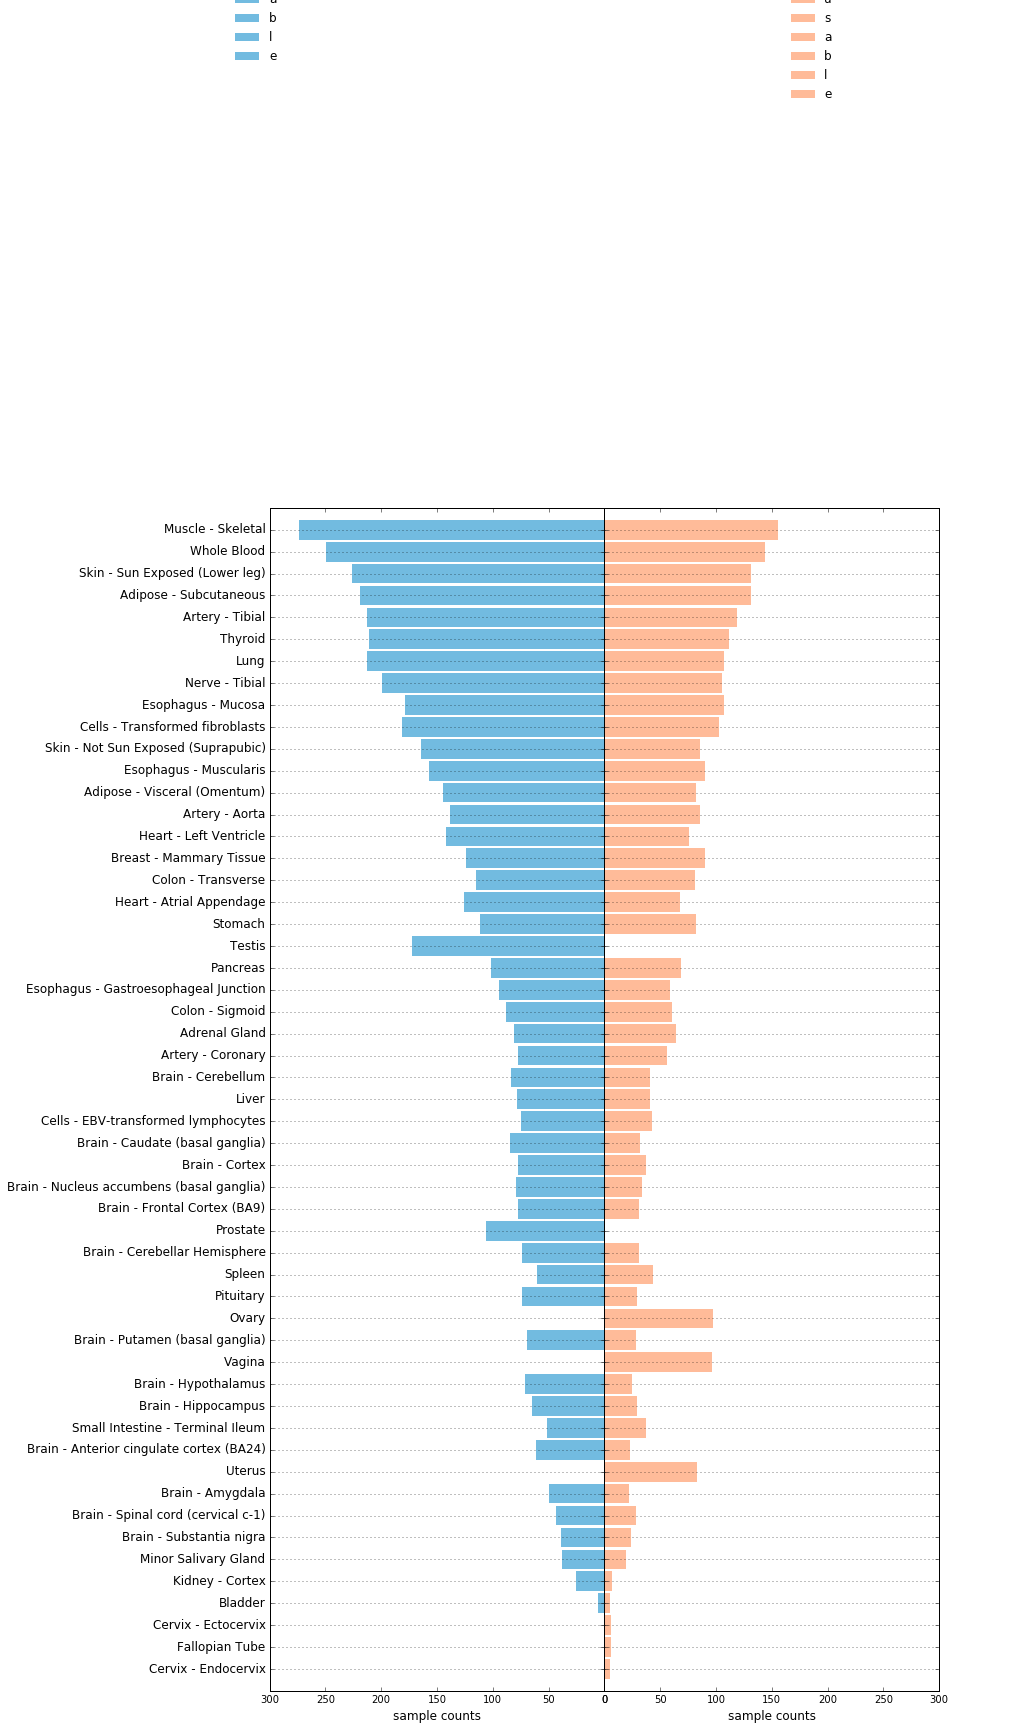

In [14]:
ind = 1 + np.arange(len(tissueNames))  # the x locations for the groups
width = 0.9 # the width of the bars


fig, axes = plt.subplots(ncols=2, sharey=True)
for i in [0,1]:
    if i == 0:
        l1 = axes[i].barh(ind, maleTotal, width, align='center', color='#72BBE0',edgecolor = "none")
        #l2 = axes[i].barh(ind, maleUsable, width, align='center', color='#177AC1',edgecolor = "none")
        # axes[i].set_title('Male',fontsize = 13)
    else:
        l3 = axes[i].barh(ind, femaleTotal, width, align='center', color='#ffbb99',edgecolor = "none")
        #l4 = axes[i].barh(ind, femaleUsable, width, align='center', color='#900C3F',edgecolor = "none")
        # axes[i].set_title('Female',fontsize = 13)
    axes[i].axis([0, 300, 0, len(tissueNames)+1])
    axes[i].yaxis.grid() 
    axes[i].set_xlabel('sample counts',fontsize = 12)


axes[0].set_yticks(ind)
axes[0].set_yticklabels(tuple(tissueNames),fontsize = 12)
axes[0].invert_xaxis()


fig.set_size_inches(12, len(tissueNames)*0.4, forward=True)
fig.subplots_adjust(wspace=0)
fig.legend((l1), ('male usable'), 'upper left',bbox_to_anchor=(0.26, 1.13, 1., .102),ncol=1,frameon=False)
fig.legend((l3), ('female usable'),'upper right',bbox_to_anchor=(-0.02, 1.13, 1., .102),ncol=1,frameon=False)
fig.show()
'''
fig.legend((l1, l2), ('male unusable', 'male usable'), 'upper left',bbox_to_anchor=(0.26, 1.13, 1., .102),ncol=2,frameon=False)
fig.legend((l4, l3), ('female usable', 'female unusable'),'upper right',bbox_to_anchor=(-0.02, 1.13, 1., .102),ncol=2,frameon=False)
'''

In [6]:
ind

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

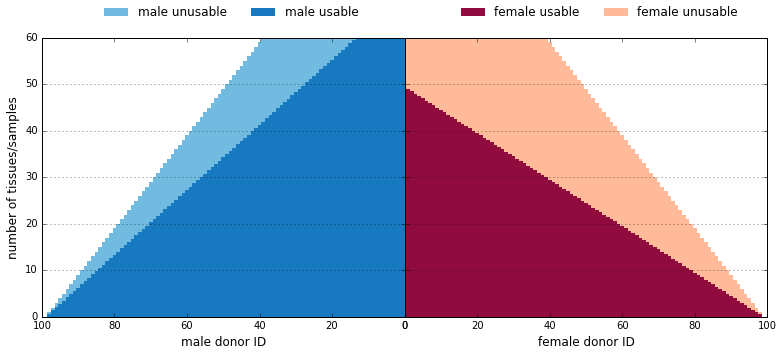

In [205]:
# load the four variables below from file by male and female
mIDTotal = np.array(range(100))
mIDUsable =mIDTotal * 0.7
fIDTotal = np.array(range(100))
fIDUsable = fIDTotal* 0.5

# 
sortIdx = np.argsort(mIDTotal)[::-1]
mIDTotal = mIDTotal[sortIdx]
mIDUsable = mIDUsable[sortIdx]
sortIdx = np.argsort(fIDTotal)[::-1]
fIDTotal = fIDTotal[sortIdx]
fIDUsable = fIDUsable[sortIdx]

sortIdx = np.argsort(fIDTotal)


ind = 1 + np.arange(len(tissueNames))  # the x locations for the groups
width = 1 # the width of the bars


fig, axes = plt.subplots(ncols=2, sharey=True)
for i in [0,1]:
    if i == 0:
        l1 = axes[i].bar(np.arange(len(mIDTotal)), mIDTotal, width, align='center', color='#72BBE0',edgecolor = "none")
        l2 = axes[i].bar(np.arange(len(mIDUsable)), mIDUsable, width, align='center', color='#177AC1',edgecolor = "none")
        # axes[i].set_title('Male',fontsize = 13)
    else:
        l3 = axes[i].bar(np.arange(len(fIDTotal)), fIDTotal, width, align='center', color='#ffbb99',edgecolor = "none")
        l4 = axes[i].bar(np.arange(len(fIDUsable)), fIDUsable, width, align='center', color='#900C3F',edgecolor = "none")
        # axes[i].set_title('Female',fontsize = 13)
    axes[i].axis([0, np.max([len(mIDTotal),len(fIDTotal)]), 0, 60])
    axes[i].yaxis.grid() 

axes[0].set_xlabel('male donor ID',fontsize = 12)
axes[1].set_xlabel('female donor ID',fontsize = 12)
axes[0].set_ylabel('number of tissues/samples',fontsize = 12)
axes[0].invert_xaxis()


fig.set_size_inches(13, 5, forward=True)
fig.subplots_adjust(wspace=0)
fig.legend((l1, l2), ('male unusable', 'male usable'), 'upper left',bbox_to_anchor=(0.1, 0.90, 1., .102),ncol=2,frameon=False)
fig.legend((l4, l3), ('female usable', 'female unusable'),'upper right',bbox_to_anchor=(-0.2, 0.90, 1., .102),ncol=2,frameon=False)


